In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Simple Linear Regression (1 independent variable + 1 target variable)

## Experiment with Original Data

### Load Data

In [2]:
# load package for loading data

In [3]:
housing_dataset = pd.read_csv('boston_housing.csv')
housing_dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


### Train-Test Set Spliting

Requirement:
* Use the average number of rooms (RM) to estimate the house price (MEDV)
* Split training, testing set with ratio 7:3 and random state = 42

In [4]:
X = housing_dataset[['RM']].values
y = housing_dataset[['MEDV']].values

In [5]:
y=y.flatten()

In [ ]:
# load package for spliting data


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Data Visualization

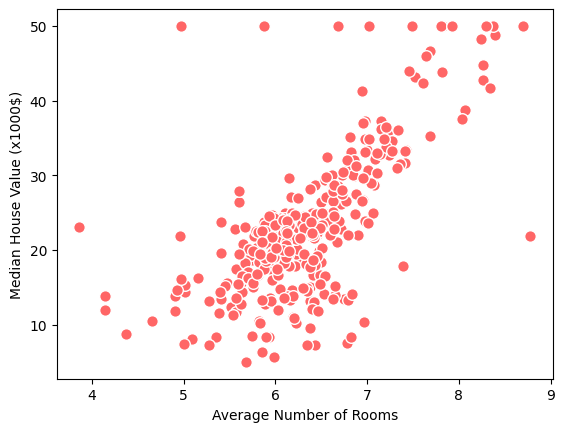

In [7]:
# visualize data
# xlabel: 'Average Number of Rooms'; ylabel: 'Median House Value (x1000$)'
plt.scatter(X_train, y_train, facecolor='#FF6666', edgecolor='white', s=70)
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.show()

### Normal Equation

In [40]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred_NE = model.predict(X_train)

In [42]:
y_pred_NE = y_pred_NE.flatten()

Visualize the prediction of Normal Equation model on Training Data

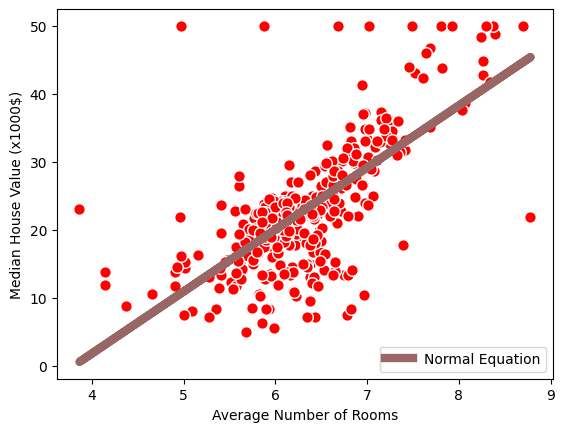

In [44]:
plt.scatter(X_train, y_train, facecolor='red', edgecolor='white', s=70)
plt.plot(X_train, model.predict(X_train), color='#996666', lw=6, label='Normal Equation')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

In [53]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
mse_NE = mean_squared_error(y_train, y_pred_NE)
mae_NE = mean_absolute_error(y_train, y_pred_NE)
r2_NE = r2_score(y_train, y_pred_NE)
print("MSE = " ,mse_NE)
print("MAE = ",mae_NE)
print("R2 = ",r2_NE)

MSE =  45.01275449524406
MAE =  4.5030631562319705
R2 =  0.4878892853275991


### Linear Regression (Base)

In [11]:
class LinearRegression:
    def __init__(self):
        self.w = None

    def predict(self, X):
        return X.dot(self.w[1:]) + self.w[0]

    def fit(self, X, y):
        pass

### Gradient Descent

In [12]:
class GradientDescent(LinearRegression):
    def __init__(self, eta=0.01, max_iter=200, random_state=42):
        super().__init__()
        self.eta = eta
        self.max_iter = max_iter
        self.random_state = random_state
        self.costs = []

    def fit(self, X, y):
        # Initialize weight values
        rgen = np.random.RandomState(self.random_state)
        self.w = rgen.normal(loc=0.0, scale=0.01, size= 1 + X.shape[1])

        self.costs = []
        for iter_i in range(self.max_iter):  # For each iteration,
            y_pred = self.predict(X)  # Predict output of X
            diff = y - y_pred  # Compute the differences

            self.w[0] += self.eta * np.sum(diff)  # Update intercept
            self.w[1:] += self.eta * np.dot(X.T, diff)  # Update coeff
            J = 1/2 * np.sum(diff ** 2)  # Compute cost value
            self.costs.append(J)  # Store cost value at ith-iteration

- Requirement: Experiment with
-- Different learning rate values: eta = {1e-2, 1e-3, 1e-4}
-- Maximum number of iterations = 200
-- Random state = 42
- What is the suitable 'learning rate' value?

In [27]:
reg_GD = GradientDescent(eta=0.0001, max_iter=200, random_state=42)
reg_GD.fit(X_train, y_train)

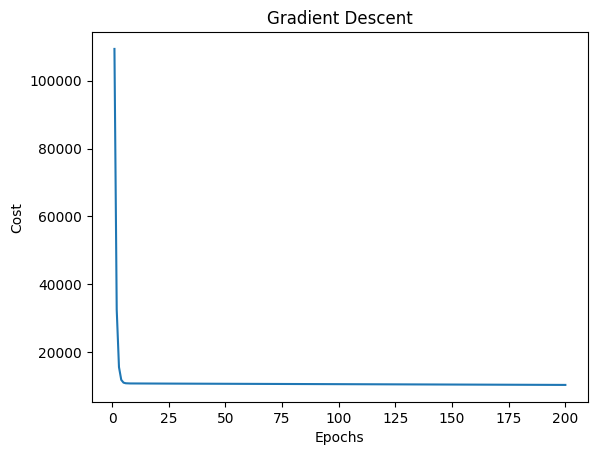

In [28]:
# Visualize the cost trend
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

Visualize the prediction of Gradient Descent model on Training Data

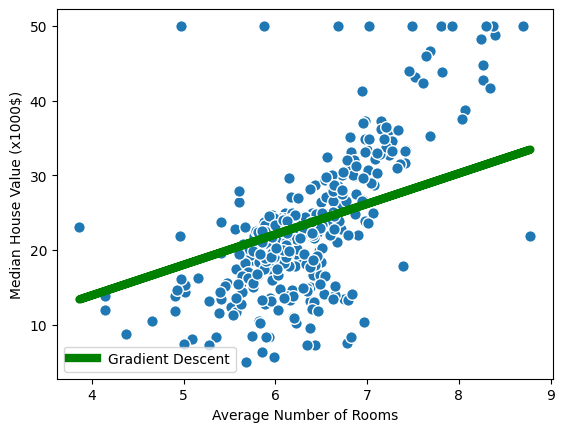

In [ ]:
plt.scatter(X_train, y_train, facecolor='tab:blue', edgecolor='white', s=70)
plt.plot(X_train, reg_GD.predict(X_train), color='green', lw=6, label='Gradient Descent')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

In [ ]:
w_GD = reg_GD.w
w_GD

array([-2.39730964,  4.08082808])

### Stochastic Gradient Descent

- Requirement: Experiment with
-- Different learning rate values: eta0 = 1e-4
-- Maximum number of iterations = 200
-- Random state = 42

In [ ]:
# Initialize the model
reg_SGD = '...'

# Train model
reg_SGD.fit('...', '...')

Visualize the prediction of Stochastic Gradient Descent model on Training Data

In [ ]:
plt.scatter(X_train, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train, reg_SGD.predict(X_train), color='black', lw=4, label='Stochastic Gradient Descent')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Normal Equation (sklearn)

In [ ]:
# Intialize the Normal Equation model
reg_NE = '...'

# Train model
reg_NE.fit('...', '...')

Visualize the prediction of Normal Equation model on Training Data

In [ ]:
plt.scatter(X_train, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train, reg_NE.predict(X_train), color='orange', lw=2, label='Normal Equation')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Visualize all models on Training Data

In [ ]:
plt.scatter(X_train, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train, reg_GD.predict(X_train), color='green', lw=6, label='Gradient Descent')
plt.plot(X_train, reg_SGD.predict(X_train), color='black', lw=4, label='Stochastic Gradient Descent')
plt.plot(X_train, reg_NE.predict(X_train), color='orange', lw=2, label='Normal Equation')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Algorithms Comparisons

Weight Comparisions

In [ ]:
w_GD = reg_GD.w
w_SGD = reg_SGD.w
w_NE = reg_NE.w
print(w_GD)
print(w_SGD)
print(w_NE)

Performance Comparisons (on Testing Set)

In [ ]:
y_pred_GD = '...'

In [ ]:
y_pred_SGD = '...'

In [ ]:
y_pred_NE = '...'

In [ ]:
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2

In [ ]:
print('MAE of GD:', round(MAE(y_test, y_pred_GD), 6))
print('MAE of SGD:', round(MAE(y_test, y_pred_SGD), 6))
print('MAE of NE:', round(MAE(y_test, y_pred_NE), 6))

In [ ]:
print('MSE of GD:', round(MSE(y_test, y_pred_GD), 6))
print('MSE of SGD:', round(MSE(y_test, y_pred_SGD), 6))
print('MSE of NE:', round(MSE(y_test, y_pred_NE), 6))

In [ ]:
print('R2 of GD:', round(R2(y_test, y_pred_GD), 6))
print('R2 of SGD:', round(R2(y_test, y_pred_SGD), 6))
print('R2 of NE:', round(R2(y_test, y_pred_NE), 6))

## Experiment with Standardized Data

In [ ]:
# Re-load the dataset
housing_dataset = '...'

In [ ]:
# load the package for standardizing data (Standard Scaler)


In [ ]:
# Standardize the 'RM' column
scaler = StandardScaler()
housing_dataset[['RM']] = scaler.fit_transform(housing_dataset[['RM']])

In [ ]:
# X_new <- 'RM' column, y <- 'MEDV' column
X_new = '...'
y = '...'

In [ ]:
# Train-test spliting (7:3, random state = 42)
X_train_norm, X_test_norm, y_train, y_test = '...'

### Gradient Descent

In [ ]:
# Initalize the Gradient Descent model with: learning rate = 1e-3, max_iter = 200, random_state = 42
reg_GD = '...'

# Train model on standardized data
reg_GD.fit('...', '...')


# Visualize the cost trend
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

Visualize the prediction of Gradient Descent model on Training Data



In [ ]:
plt.scatter(X_train_norm, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train_norm, reg_GD.predict(X_train_norm), color='green', lw=6, label='Gradient Descent')
plt.xlabel('Average Number of Rooms (normalized)')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Stochastic Gradient Descent

In [ ]:
# Initalize the Stochastic Gradient Descent model with: eta0 = 1e-3, max_iter = 200, random_state=42, learning_rate = 'constant'
reg_SGD = '...'

# Train SGD model on standardized data
reg_SGD.fit('...', '...')

Visualize the prediction of Stochastic Gradient Descent model on Training Data


In [ ]:
plt.scatter(X_train_norm, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train_norm, reg_SGD.predict(X_train_norm), color='black', lw=4, label='Stochastic Gradient Descent')
plt.xlabel('Average Number of Rooms (normalized)')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Normal Equation (sklearn)

In [ ]:
# Initalize the Normal Equation model
reg_NE = '...'

# Train model
reg_NE.fit('...', '...')

In [ ]:
plt.scatter(X_train_norm, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train_norm, reg_NE.predict(X_train_norm), color='orange', lw=2, label='Normal Equation')
plt.xlabel('Average Number of Rooms (normalized)')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Visualize all models on Training Data

In [ ]:
plt.scatter(X_train_norm, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train_norm, reg_NE.predict(X_train_norm), color='green', lw=6, label='Gradient Descent')
plt.plot(X_train_norm, reg_SGD.predict(X_train_norm), color='black', lw=4, label='Stochastic Gradient Descent')
plt.plot(X_train_norm, reg_GD.predict(X_train_norm), color='orange', lw=2, label='Normal Equation')
plt.xlabel('Average Number of Rooms (normalized)')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Algorithms Comparisons

In [ ]:
w_GD = reg_GD.w
w_GD

In [ ]:
w_SGD = reg_SGD.w
w_SGD

In [ ]:
w_NE = reg_NE.w
w_NE

In [ ]:
y_pred_GD = reg_GD.predict(X_test_norm)

In [ ]:
y_pred_SGD = reg_SGD.predict(X_test_norm)

In [ ]:
y_pred_NE = reg_NE.predict(X_test_norm)

In [ ]:
print('MAE of GD:', round(MAE(y_test, y_pred_GD), 6))
print('MAE of SGD:', round(MAE(y_test, y_pred_SGD), 6))
print('MAE of NE:', round(MAE(y_test, y_pred_NE), 6))

In [ ]:
print('MSE of GD:', round(MSE(y_test, y_pred_GD), 6))
print('MSE of SGD:', round(MSE(y_test, y_pred_SGD), 6))
print('MSE of NE:', round(MSE(y_test, y_pred_NE), 6))

In [ ]:
print('R2 of GD:', round(R2(y_test, y_pred_GD), 6))
print('R2 of SGD:', round(R2(y_test, y_pred_SGD), 6))
print('R2 of NE:', round(R2(y_test, y_pred_NE), 6))

# Multiple Linear Regression (n independent variable (n >=2) + 1 target variable)

## Experiment with normal data

In [ ]:
# Re-load dataset
housing_dataset = '...'

* X: 13 remaining variables (except 'MEDV' variable)
* y: 'MEDV' variable

In [ ]:
X = '...'
y = '...'

In [ ]:
# Train-test set spliting with ratio 7:3, random_state = 42
X_train, X_test, y_train, y_test = '...'

### Gradient Descent

- Experiment with:
-- max_iter = 200
-- random_state = 42
-- learning_rate (eta) = {1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8}
- What is the suitable learning rate value?

In [ ]:
# Initalize the GD model
reg_GD = '...'

# Train model
reg_GD.fit('...', '...')

# Visualize the cost trend
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

### Stochastic Gradient Descent

In [ ]:
# Initialize the SGD model
reg_SGD = '...'

# Train model
reg_SGD.fit('...', '...')

### Normal Equation

In [ ]:
# Add the '1' column to data


In [ ]:
# Intialize the NE model
reg_NE = '...'

# Train model
reg_NE.fit('...', '...')

### Algorithms Comparisons

In [ ]:
w_GD = reg_GD.w
w_GD

In [ ]:
w_SGD = reg_SGD.w
w_SGD

In [ ]:
w_NE = reg_NE.w
w_NE

In [ ]:
y_pred_GD = reg_GD.predict(X_test)

In [ ]:
y_pred_SGD = reg_SGD.predict(X_test)

In [ ]:
y_pred_NE = reg_NE.predict(X_test)

In [ ]:
print('MAE of GD:', round(MAE(y_test, y_pred_GD), 6))
print('MAE of SGD:', round(MAE(y_test, y_pred_SGD), 6))
print('MAE of NE:', round(MAE(y_test, y_pred_NE), 6))

In [ ]:
print('MSE of GD:', round(MSE(y_test, y_pred_GD), 6))
print('MSE of SGD:', round(MSE(y_test, y_pred_SGD), 6))
print('MSE of NE:', round(MSE(y_test, y_pred_NE), 6))

In [ ]:
print('R2 of GD:', round(R2(y_test, y_pred_GD), 6))
print('R2 of SGD:', round(R2(y_test, y_pred_SGD), 6))
print('R2 of NE:', round(R2(y_test, y_pred_NE), 6))

## Experiment with Standardized Data

In [ ]:
# Re-load dataset
housing_dataset = '...'

In [ ]:
# Get the columns' names
name_columns = housing_dataset.columns.values
name_columns

In [ ]:
# Initialize the standardize scaler
scaler = '...'

# Standardize all independent variables
housing_dataset[name_columns[:-1]] = scaler.fit_transform(housing_dataset[name_columns[:-1]])

X_new <- 13 independent variables

y <- 'MEDV' column

In [ ]:
X_new = '...'
y = '...'

In [ ]:
# Split train-test set (7:3, random_state = 42)
X_train_norm, X_test_norm, y_train, y_test = '...'

### Gradient Descent

- Experiment with following learning rates = {1e-3, 1e-5, 1e-4}
- max_iter = 200
- random_state = 42

In [ ]:
# Initalize the GD model
reg_GD = '...'

# Train model on normalized data
reg_GD.fit('...', '...')

# Visualize the cost trend
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

### Stochastic Gradient Descent

In [ ]:
# Initialize SGD model (eta0=1e-4, max_iter=200, random_state=42, learning_rate='constant')
reg_SGD = '...'

# Train model
reg_SGD.fit('...', '...')

### Normal Equation (sklearn)

In [ ]:
# Initialize NE model
reg_NE = '...'

# Train model
reg_NE.fit('...', '...')

### Algorithms Comparisons

In [ ]:
w_GD = reg_GD.w
w_GD

In [ ]:
w_SGD = np.append(reg_SGD.intercept_, reg_SGD.coef_)
w_SGD

In [ ]:
w_NE = np.append(reg_NE.intercept_, reg_NE.coef_)
w_NE

In [ ]:
y_pred_GD = reg_GD.predict(X_test_norm)

In [ ]:
y_pred_SGD = reg_SGD.predict(X_test_norm)

In [ ]:
y_pred_NE = reg_NE.predict(X_test_norm)

In [ ]:
print('MAE of GD:', round(MAE(y_test, y_pred_GD), 6))
print('MAE of SGD:', round(MAE(y_test, y_pred_SGD), 6))
print('MAE of NE:', round(MAE(y_test, y_pred_NE), 6))

In [ ]:
print('MSE of GD:', round(MSE(y_test, y_pred_GD), 6))
print('MSE of SGD:', round(MSE(y_test, y_pred_SGD), 6))
print('MSE of NE:', round(MSE(y_test, y_pred_NE), 6))

In [ ]:
print('R2 of GD:', round(R2(y_test, y_pred_GD), 6))
print('R2 of SGD:', round(R2(y_test, y_pred_SGD), 6))
print('R2 of NE:', round(R2(y_test, y_pred_NE), 6))

# Explain what $R^2$ coefficient is.